<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from utilities import pmfplot

## 10.4 Binomial Distribution
The binomial distribution is based on the Bernoulli distribution: there are
$n$ mutually independent Bernoulli trials, each of which can take the outcomes Failure or Success. Then, the binomial distribution gives the probability of observing, e.g.,
the outcome "$k$-times Success" during performing $n$ Bernoulli experiments.

### Plot the discrete distribution 

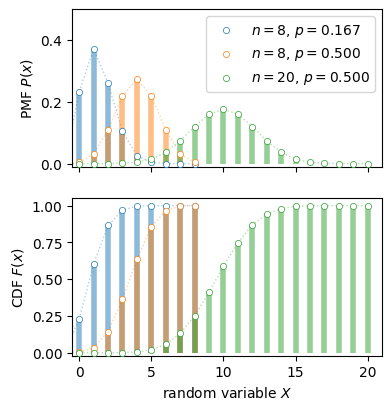

In [2]:
xlim = (0, 8)
ylim = (-0.01, 0.5)

kws = [
    {'n': 8, 'p': 1/6, 'color': 'C0', 'ls': '-'},
    {'n': 8, 'p': 0.5, 'color': 'C1', 'ls': '-'},
    {'n': 20, 'p': 0.5, 'color': 'C2', 'ls': '-'},
]

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(4, 4.5))


for d in kws:
    n, p = d['n'], d['p']
    x = np.arange(stats.binom.ppf(0.0, n, p), stats.binom.ppf(1., n, p)+1 )   
    pmfplot(ax[0], x, stats.binom.pmf(x, n, p), c=d['color'], label=r'$n={}$, $p={:3.3f}$'.format(n, p))
    pmfplot(ax[1], x, stats.binom.cdf(x, n, p), c=d['color'], label=r'$n={}$, $p={:3.3f}$'.format(n, p))
    
    ax[0].plot(x, stats.binom.pmf(x, n, p), c=d['color'], lw=1, ls=':', alpha=0.35)
    ax[1].plot(x, stats.binom.cdf(x, n, p), c=d['color'], lw=1, ls=':', alpha=0.35)
    
ax[0].legend()
xlim = (-0.5, max([k['n'] for k in kws]) + 1)
ax[0].set(xlabel=r"", ylabel=r"PMF $P(x)$", xlim=xlim, ylim=ylim)
ax[1].set(xlabel=r"random variable $X$", ylabel=r"CDF $F(x)$", xlim=xlim, ylim=[-0.02, 1.05]);

### Draw samples from the Bernoulli Distribution

In [3]:
rng = np.random.default_rng()

n_samples = 100
n = 20
p = 0.5
sample = rng.binomial(n=n, p=p, size=n_samples)

Now show the distribution of these samples -- they roughly approximate the "true" distribution of the population shown above:

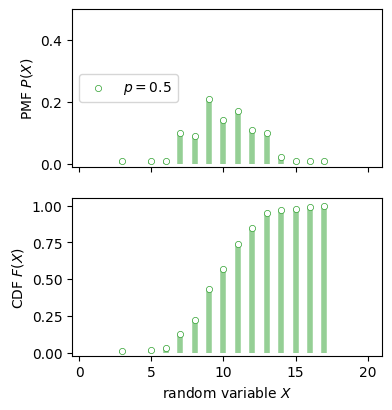

In [9]:
# Counting of events is done as for the Bernoulli distribution:
values = np.unique(sample)
counts = np.array([np.sum(sample == s) for s in values])
pmf = counts / counts.sum()
pdf = np.cumsum(pmf)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(4, 4.5))
pmfplot(ax[0], values, pmf, c='C2', label=r'$p={}$'.format(p))
pmfplot(ax[1], values, pdf, c='C2')
ax[0].set(xlabel=r"", ylabel=r"PMF $P(X)$", xlim=xlim, ylim=ylim)
ax[1].set(xlabel=r"random variable $X$", ylabel=r"CDF $F(X)$", xlim=xlim, ylim=[-0.02, 1.05])    
ax[0].legend(loc=6)